Import required libraries for training the model

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np

In [ ]:
!unzip /content/drive/MyDrive/archive.zip

Prepare data from the files which are in image format for training, Image data generator generates images with different zoom scales and flips them on their axes to create new images from existing ones which help improve model accuracy

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   zoom_range = 0.3, rotation_range=20, shear_range=0.2,
                                   horizontal_flip=True)

train_data = train_datagen.flow_from_directory('/content/train', batch_size=64, target_size=(48, 48), shuffle=True, color_mode='grayscale', class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1/255)

test_data = test_datagen.flow_from_directory('/content/test', batch_size=64, target_size=(48, 48), shuffle=True, color_mode='grayscale', class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Classes which the model predicts on


In [ ]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

Model for detecting emotions

Contains two sets of CNNs with 2 sets of Convulutional 2D layers and a pooling layer which helps scale dimensions of the image while training.

Batch normalization and dropout help reduce overfitting and make the model more accurate

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(7, activation='softmax'),
])

Compile the model with required loss functions, optimizer for training

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 44, 44, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       7

Add callback to stop training when best accuracy metrics are obtained

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=1,
    patience=1,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=10,
)

Train model

In [ ]:
history = model.fit(train_data, validation_data=test_data, epochs=10, callbacks=[early_stop],steps_per_epoch=train_data.n//train_data.batch_size, validation_steps=test_data.n//test_data.batch_size)

Epoch 1/10
448/448 [==============================] - 31s 69ms/step - loss: 0.7699 - accuracy: 0.7195 - val_loss: 1.1233 - val_accuracy: 0.6359
Epoch 2/10
448/448 [==============================] - 29s 64ms/step - loss: 0.7490 - accuracy: 0.7263 - val_loss: 1.1622 - val_accuracy: 0.6342
Epoch 3/10
448/448 [==============================] - 31s 69ms/step - loss: 0.7441 - accuracy: 0.7305 - val_loss: 1.1544 - val_accuracy: 0.6458
Epoch 4/10
448/448 [==============================] - 29s 64ms/step - loss: 0.7406 - accuracy: 0.7303 - val_loss: 1.1567 - val_accuracy: 0.6415
Epoch 5/10
448/448 [==============================] - 29s 65ms/step - loss: 0.7263 - accuracy: 0.7369 - val_loss: 1.1795 - val_accuracy: 0.6349
Epoch 6/10
448/448 [==============================] - 29s 66ms/step - loss: 0.7233 - accuracy: 0.7361 - val_loss: 1.1708 - val_accuracy: 0.6394
Epoch 7/10
448/448 [==============================] - 29s 65ms/step - loss: 0.7149 - accuracy: 0.7387 - val_loss: 1.1617 - val_accuracy:

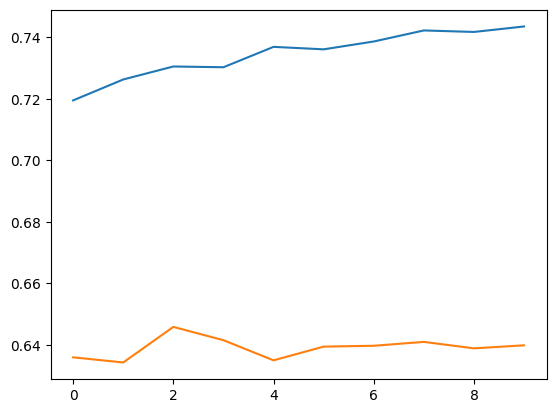

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.save('/content/model', save_format='h5')